## Data Generation

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 735
points = np.genfromtxt('Skin_NonSkin.txt', delimiter = '\t')

number_of_rows = 2*735 ##3% of all data - at least my laptop will not die
points = points[:int(number_of_rows)]
#points = normilize1(points[:int(number_of_rows)])


simulated_separableish_features = np.vstack(points).astype(np.float32)
#np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

In [52]:
def normilize1(points):
    return (points[:, 0] - points.mean(axis=1))/points.std(axis=1)

In [53]:
def normilize2(points):
    return (points[:, 0] - points.min(axis=1))/(points.max(axis=1) - points.min(axis=1))

## Data Visualisation 

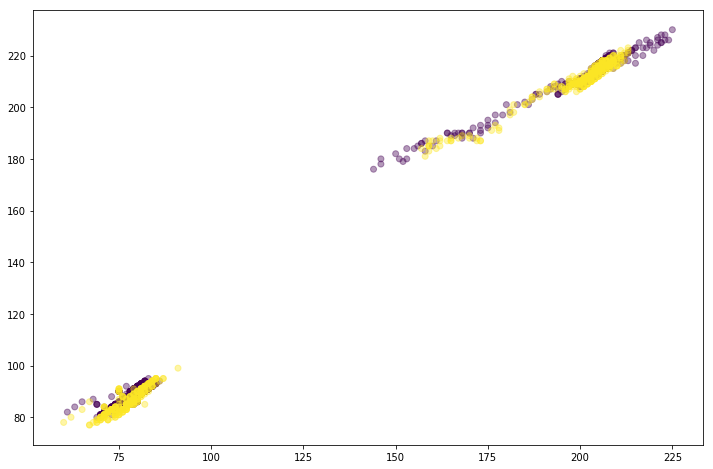

In [54]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

## Sigmoid Function

In [55]:
def sigmoid(x):
    '''1 / (1 + e^(-x))'''
    return 1 / (1 + np.exp(-x))


## Log-Likelihood

In [56]:
def log_likelihood(features, target, weights):
    '''
        U = sum(target * weights_tr * features - log(1 + exp(weights_tr * features)))
         return np.sum(target * weights.T * features - np.log(1 + np.exp(weights.T * features)))
    '''
    scores = np.dot(features, weights)
    return np.sum(target * scores - np.log(1 + np.exp(scores)))
   

## Gradient of the Log-likelihood

In [57]:
def grad(features, target, predictions):
    '''
        grad(U) = features_tr * (target - predictions)
    '''
    diff = target - predictions
    return np.dot(features.T, diff)

## Logistic regression

In [58]:
def logistic_regression(features, target, num_steps, learning_rate):
    # add free coefficients as 1
    features = np.hstack(
        (np.ones((features.shape[0], 1)),features))
    
    # initialize weights
    weights = np.zeros(features.shape[1])
    
    # iterative process
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        gradient = grad(features, target, predictions)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [59]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 100000, learning_rate = 5e-5)

-4653.92106704


C:\Users\opolishchuk\Anaconda31\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


-1619733.33714
-1573226.13047
-1498137.35993
-1490231.67069
-1455154.28361
-1408072.4357
-1360215.89693
-1309606.5588
-1249732.80649


## Check results on data

C:\Users\opolishchuk\Anaconda31\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


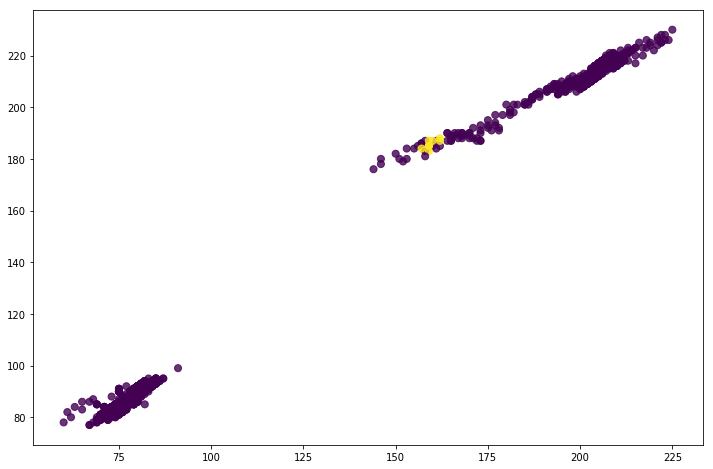

In [60]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)